In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
"""
    libraries used for feature engineering
"""
### Missing data
import missingno as ms  ## used for vis missing data
from sklearn.impute import SimpleImputer ## sklearn lib used for filling missing data
### outliers
from collections import Counter  ## used in droping outliers
### correlation matrix
#import association_metrics as am ## used for correlation matrix between categorical features
### feature scaling
from sklearn.preprocessing import StandardScaler  ## standard scalar will scale data from (-3 to 3)
### encoding categorical features
from sklearn.preprocessing import LabelEncoder ## for label encoding categorical features
from sklearn.compose import ColumnTransformer  ## used for onehot encoding categorical features
from sklearn.preprocessing import OneHotEncoder ## used for onehot encoding categorical features
### splitting data
from sklearn.model_selection import train_test_split ## used to split the data into training and testing
"""
 necessary libraries for hyperparameters and training and testing
"""
### for hyperparameter fine tuning
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV ## used for tuning the models parameters
### ML models
from sklearn.linear_model import LinearRegression   
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor   
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
### for printing a table
from prettytable import PrettyTable
from prettytable import ALL, FRAME
### Calculating R2, RMSE and cross-validation
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [2]:
## The training dataset
dataset = pd.read_csv('train.csv')

In [3]:
## shape of the training dataset
print('shape of the training dataset:')
print('There are {} rows and {} columns in train dataset.'.format(dataset.shape[0],dataset.shape[1]))

shape of the training dataset:
There are 1460 rows and 81 columns in train dataset.


In [4]:
dataset.shape

(1460, 81)

In [5]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# From our data_description file we observed that the following variable types were taken as numerical meanwhile they are categorical variables
int_obj = ['YrSold','MoSold','YearBuilt','YearRemodAdd','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','GarageYrBlt','MSSubClass']

In [8]:
# Change int & float to object types
for val in int_obj:
    dataset[val] = dataset[val].astype('object')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [10]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
## The theme and size and resolution of the plots

plt.figure(figsize=(6,3))  ## figure size
sns.set_theme(style="whitegrid", palette="muted") ## background, color type
sns.set_context('notebook', font_scale = 1.0, rc={"lines.linewidth": 1.5})
## font properties
plt.rcParams['font.family']='cursive'
plt.rcParams['font.stretch']='condensed'
plt.rcParams['font.style']='italic'
plt.rcParams['font.weight']='heavy'
#plt.rcParams['font.size']=15
plt.rcParams['figure.dpi'] = 120  ## resolution

<Figure size 432x216 with 0 Axes>

<AxesSubplot:title={'center':'House Sale Price'}, xlabel='SalePrice'>

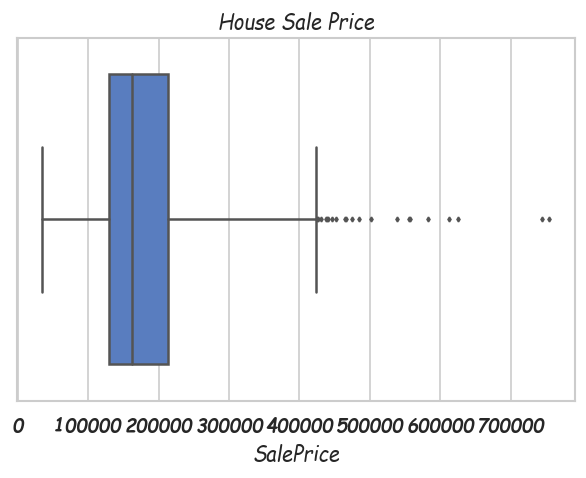

In [12]:
plt.title("House Sale Price")
sns.boxplot(data=dataset, x="SalePrice", whis=2.5, fliersize=2)

In [13]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
## two statements should be used together, can be used with large dataset
dataset.fillna(method='bfill', inplace=True)  ## fill missing values by previous value
dataset.fillna(method='ffill', inplace=True)  ## fill missing values by next value

In [16]:
dataset.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [17]:
dataset.duplicated().sum()

0

In [18]:
numeric_columns = [x for i,x in enumerate(dataset.select_dtypes(include=np.number).columns.tolist()) if(x!='SalePrice')] 

In [19]:
col_drops = ['Id', 'MSSubClass', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',
             'KitchenAbvGr', '3SsnPorch', 'MiscVal', 'ScreenPorch', 'PoolArea','YrSold'] ## cols to drop 
dataset.drop(col_drops,axis=1,inplace=True)  ## drop these cols

In [20]:
numeric_cols = dataset.select_dtypes(include=np.number).columns.tolist()
categorical_cols = set(dataset.columns).difference(set(numeric_cols))   
print(categorical_cols)

{'LotConfig', 'Foundation', 'LandSlope', 'GarageFinish', 'Condition2', 'Condition1', 'BsmtFinType1', 'Exterior2nd', 'Functional', 'BsmtFinType2', 'BsmtExposure', 'GarageCond', 'Heating', 'ExterCond', 'Exterior1st', 'RoofMatl', 'HouseStyle', 'BldgType', 'Fence', 'BsmtQual', 'Neighborhood', 'GarageType', 'Electrical', 'RoofStyle', 'HeatingQC', 'LandContour', 'BsmtCond', 'PoolQC', 'SaleType', 'MSZoning', 'Street', 'Utilities', 'Alley', 'MiscFeature', 'CentralAir', 'MasVnrType', 'LotShape', 'ExterQual', 'GarageQual', 'PavedDrive', 'KitchenQual', 'SaleCondition', 'FireplaceQu'}


In [21]:
for i, x in enumerate(categorical_cols):  ## print all unique values in categorical columns
    print(x, dataset[x].unique())

LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Foundation ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
LandSlope ['Gtl' 'Mod' 'Sev']
GarageFinish ['RFn' 'Unf' 'Fin']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']
Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
Functional ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
BsmtFinType2 ['Unf' 'BLQ' 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtExposure ['No' 'Gd' 'Mn' 'Av']
GarageCond ['TA' 'Fa' 'Gd' 'Po' 'Ex']
Heating ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
RoofMatl ['CompSh

In [22]:
numeric_cols = dataset.select_dtypes(include=np.number).columns.tolist()
categorical_cols = set(dataset.columns).difference(set(numeric_cols)) 

In [23]:
lecols = []  ## names of columns that will label encoded
for x in categorical_cols:
    lecols.append(x)

In [24]:
le = LabelEncoder()
dataset[lecols] = dataset[lecols].apply(le.fit_transform)

In [25]:
dataset.head(6)

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,3,65.0,8450,1,0,3,3,0,4,0,...,0,61,0,0,2,2,2,8,4,208500
1,3,80.0,9600,1,0,3,3,0,2,0,...,298,0,0,0,2,2,5,8,4,181500
2,3,68.0,11250,1,0,0,3,0,4,0,...,0,42,0,0,2,2,9,8,4,223500
3,3,60.0,9550,1,0,0,3,0,0,0,...,0,35,272,0,2,2,2,8,0,140000
4,3,84.0,14260,1,0,0,3,0,2,0,...,192,84,0,0,2,2,12,8,4,250000
5,3,85.0,14115,1,0,0,3,0,4,0,...,40,30,0,0,2,2,10,8,4,143000


In [26]:
sc_X = StandardScaler()  ## scalar for all numerical columns excluding target column
sc_y = StandardScaler()  ## scalar for the target column
numeric_cols = dataset.select_dtypes(include=np.number).columns.tolist()  ## list of col  names that include numerical values
## list of all numeric cols excluding the target col
numeric_cols_x = [x for i,x in enumerate(numeric_cols) if(x!='SalePrice')]
## list includes target col name
numeric_cols_y = [x for i,x in enumerate(numeric_cols) if(x not in numeric_cols_x)]
dataset[numeric_cols_x] = sc_X.fit_transform(dataset[numeric_cols_x])
dataset[numeric_cols_y] = sc_y.fit_transform(dataset[numeric_cols_y]) 

In [27]:
dataset

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,-0.045532,-0.221669,-0.207142,0.064238,-0.910809,0.750731,0.314667,-0.02618,0.604670,-0.225716,...,-0.752176,0.216503,-0.359325,-1.805131,0.615909,0.125878,-1.599111,0.313867,0.208502,0.347273
1,-0.045532,0.404967,-0.091886,0.064238,-0.910809,0.750731,0.314667,-0.02618,-0.628316,-0.225716,...,1.626195,-0.704483,-0.359325,-1.805131,0.615909,0.125878,-0.489110,0.313867,0.208502,0.007288
2,-0.045532,-0.096342,0.073480,0.064238,-0.910809,-1.378933,0.314667,-0.02618,0.604670,-0.225716,...,-0.752176,-0.070361,-0.359325,-1.805131,0.615909,0.125878,0.990891,0.313867,0.208502,0.536154
3,-0.045532,-0.430547,-0.096897,0.064238,-0.910809,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,...,-0.752176,-0.176048,4.092524,-1.805131,0.615909,0.125878,-1.599111,0.313867,-3.426284,-0.515281
4,-0.045532,0.572070,0.375148,0.064238,-0.910809,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,...,0.780197,0.563760,-0.359325,-1.805131,0.615909,0.125878,2.100892,0.313867,0.208502,0.869843
5,-0.045532,0.613845,0.360616,0.064238,-0.910809,-1.378933,0.314667,-0.02618,0.604670,-0.225716,...,-0.432931,-0.251539,-0.359325,-1.805131,0.615909,0.125878,1.360892,0.313867,0.208502,-0.477505


In [28]:
X = dataset.iloc[:, :-1].values ## independent variables
y = dataset.iloc[:, -1].values  ## dependent variables

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) ## splitting the dataset into 80% training and 20% testing

In [30]:
init_models = { 'Support vector  linear': SVR(kernel='linear'),
                'Support vector kernel': SVR(kernel='rbf'),
                'XGBOOST': XGBRegressor(),
                'Decision tree': DecisionTreeRegressor(),
                'Random forest': RandomForestRegressor(),
                'LGBM': LGBMRegressor(),
               }
R2 = []
models_names = []
for i, (key,model) in enumerate(init_models.items()):
    model.fit(X_train, y_train)
    models_names.append(key)
    R2.append(np.mean(cross_val_score(model, X_train, y_train, cv=5)))
models_scores = pd.DataFrame({'model name': models_names, 'R2 score': R2})
models_scores.head(7)

,model name,R2 score
0,Support vector linear,0.861717
1,Support vector kernel,0.817320
2,XGBOOST,0.858060
3,Decision tree,0.695292
4,Random forest,0.856780
5,LGBM,0.875032


C:\Users\ACER\AppData\Local\Temp/ipykernel_10904/3217837052.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<AxesSubplot:title={'center':'models R2 score'}, xlabel='model name', ylabel='R2 score'>

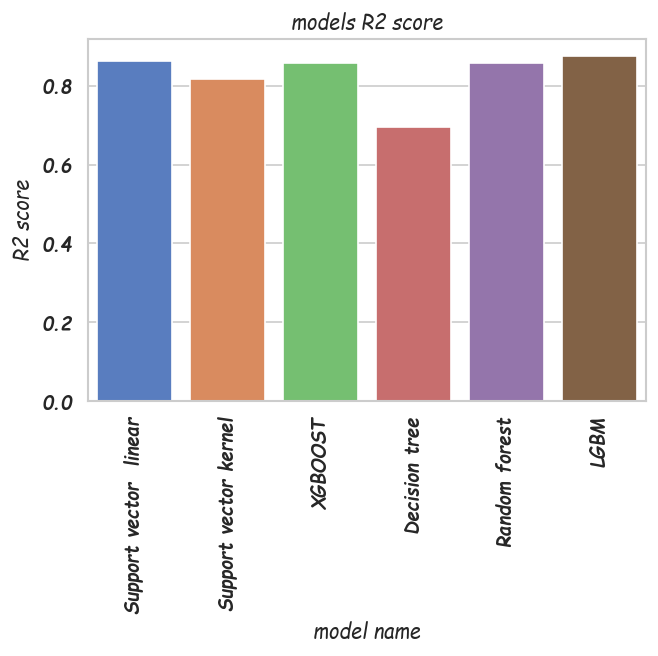

In [31]:
## plot cross validation R2 scores for the models
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("models R2 score")
sns.barplot(data=models_scores, x='model name', y="R2 score")

In [32]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 0) 

param_grid = {"max_features": ['auto', 'sqrt'],
              "max_depth": [int(x) for x in np.linspace(5,30,6)],
              "min_samples_split": [2,5,10,15,100],
              "min_samples_leaf": [1, 2, 5, 10]} 
 
rf_cv = RandomizedSearchCV(rf, param_grid, n_iter = 40, refit='recall',
        scoring='neg_mean_squared_error', cv = 5, verbose=2, random_state=42, n_jobs = -1)  
 
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=0),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, refit='recall',
                   scoring='neg_mean_squared_error', verbose=2)

In [33]:
xgb = XGBRegressor()

param_grid = {
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]
}

xgb_cv = RandomizedSearchCV(xgb, param_grid, n_iter = 100, refit='recall',
         scoring='neg_mean_squared_error', cv = 5, verbose=2, random_state=42, n_jobs = -1) 
  
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_ite

In [34]:
lgbm = LGBMRegressor()

param_grid = {
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]
}
lgbm_cv = RandomizedSearchCV(lgbm, param_grid, n_iter = 100, refit='recall',
         scoring='neg_mean_squared_error', cv = 5, verbose=2, random_state=42, n_jobs = -1)  
  
lgbm_cv.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Unknown parameter: gamma


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'max_depth': range(3, 21, 3),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 10,
                                                      100],
                                        'reg_lambda': [1e-05, 0.01, 0.1, 1, 10,
                                                       100]},
                   random_state=42, refit='recall',
                   scoring='neg_mean_squared_error', verbose=2)

In [35]:
print('*'*35 + ' Cross validation scores of the models after tuning ' + '*'*35 + '\n')
table = [['Model name', 'R2 score', 'RMSE'], 
         ['XGBOOST', 1+xgb_cv.best_score_, -xgb_cv.best_score_],
         ['Random forest', 1+rf_cv.best_score_, -rf_cv.best_score_],
         ['LGBM', 1+lgbm_cv.best_score_, -lgbm_cv.best_score_],]
tab = PrettyTable(table[0])
tab.add_row(table[1])
tab.add_row(table[2])
tab.add_row(table[3])
tab.hrules = ALL
tab.vrules = ALL
print(tab)
print('')
print('*'*123)

*********************************** Cross validation scores of the models after tuning ***********************************

+---------------+--------------------+---------------------+
|   Model name  |      R2 score      |         RMSE        |
+---------------+--------------------+---------------------+
|    XGBOOST    | 0.8745584183141883 | 0.12544158168581165 |
+---------------+--------------------+---------------------+
| Random forest | 0.8477962795334518 | 0.15220372046654818 |
+---------------+--------------------+---------------------+
|      LGBM     | 0.8802632581407146 | 0.11973674185928543 |
+---------------+--------------------+---------------------+

***************************************************************************************************************************


In [36]:
regressor = LGBMRegressor(**lgbm_cv.best_params_ )

In [37]:
regressor.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.6, gamma=0.4, max_depth=9, reg_alpha=1e-05,
              reg_lambda=1)

In [38]:
y_pred = regressor.predict(X_test) ## prediciting the value of y for the test set X_test

In [39]:
## printing the predicted values and test values side by side
np.set_printoptions(precision=2)  ## print only two decimal points
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 8.52e-01  2.48e-01]
 [-3.10e-01 -6.03e-01]
 [-8.40e-01 -8.93e-01]
 [ 3.60e-01  1.40e-01]
 [-1.12e+00 -1.17e+00]
 [-1.00e+00 -1.21e+00]
 [ 1.04e+00  1.28e+00]
 [-6.10e-01 -5.03e-01]
 [ 4.06e+00  7.10e+00]
 [-3.31e-01 -4.04e-01]
 [ 2.71e-01  3.52e-01]
 [-4.01e-01 -5.54e-01]
 [ 6.17e-01  5.55e-01]
 [-6.61e-01 -7.29e-01]
 [-7.64e-01 -7.77e-01]
 [-3.84e-01 -4.52e-01]
 [ 3.81e-01  1.14e-01]
 [-7.26e-01 -7.22e-01]
 [-4.87e-01 -3.98e-01]
 [ 1.73e-02 -3.26e-01]
 [-8.17e-01 -1.88e-01]
 [-5.13e-01 -4.59e-01]
 [-8.62e-01 -8.93e-01]
 [-2.56e-01 -8.72e-02]
 [ 7.16e-02  5.14e-02]
 [ 4.55e-01 -1.63e-01]
 [-9.26e-02 -4.31e-02]
 [-1.30e+00 -1.21e+00]
 [ 1.75e+00  1.75e+00]
 [-9.37e-01 -7.86e-01]
 [-6.06e-01 -8.93e-01]
 [ 1.56e-01  4.04e-01]
 [-4.89e-01 -3.14e-01]
 [ 1.40e+00  8.70e-01]
 [ 2.18e+00  2.41e+00]
 [ 1.79e-01 -7.46e-02]
 [ 1.35e+00  1.22e+00]
 [-6.85e-01 -8.62e-01]
 [ 6.94e-01  1.03e+00]
 [ 1.35e+00  1.81e+00]
 [ 3.73e-01  7.82e-01]
 [-7.40e-01 -6.41e-01]
 [-2.94e-02 -2.01e-01]
 [ 1.41e+00

In [40]:
dataset_test  = pd.read_csv('Data/test.csv')

In [41]:
## two statements should be used together, can be used with large dataset
dataset_test.fillna(method='bfill', inplace=True)  ## fill missing values by previous value
dataset_test.fillna(method='ffill', inplace=True)  ## fill missing values by next value

In [42]:
## We will need the Id column for submission
Id = dataset_test['Id'].values

In [43]:
new_col_drops = ['MSSubClass', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',
             'KitchenAbvGr', '3SsnPorch', 'MiscVal', 'ScreenPorch', 'PoolArea','YrSold', 'Utilities'] ## cols to drop 
dataset_test.drop(new_col_drops,axis=1,inplace=True)  ## drop these cols

In [44]:
new_numeric_cols = dataset_test.select_dtypes(include=np.number).columns.tolist()
new_categorical_cols = set(dataset_test.columns).difference(set(new_numeric_cols)) 

In [45]:
new_lecols = []  ## names of columns that will label encoded
for x in new_categorical_cols:
    new_lecols.append(x)

In [46]:
dataset_test[new_lecols] = dataset_test[new_lecols].apply(le.fit_transform)

In [47]:
dataset_test

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,1461,2,80.0,11622,1,1,3,3,4,0,...,2,140,0,0,0,2,0,6,8,4
1,1462,3,81.0,14267,1,1,0,3,0,0,...,2,393,36,0,0,2,0,6,8,4
2,1463,3,74.0,13830,1,1,0,3,4,0,...,2,212,34,0,0,2,2,3,8,4
3,1464,3,78.0,9978,1,1,0,3,4,0,...,2,360,36,0,0,0,2,6,8,4
4,1465,3,43.0,5005,1,1,0,1,4,0,...,2,0,82,0,0,0,2,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,4,21.0,1936,1,0,3,3,4,0,...,2,0,0,0,1,2,2,6,8,4
1455,2916,4,21.0,1894,1,0,3,3,4,0,...,2,0,24,0,1,2,2,4,8,0
1456,2917,3,160.0,20000,1,0,3,3,4,0,...,2,474,0,0,1,2,2,9,8,0
1457,2918,3,62.0,10441,1,0,3,3,4,0,...,2,80,32,0,1,2,2,7,8,4


In [48]:
new_numeric_cols = dataset_test.select_dtypes(include=np.number).columns.tolist()  ## list of col  names that include numerical values
dataset_test[new_numeric_cols] = sc_X.transform(dataset_test[new_numeric_cols])

In [49]:
X_new = dataset_test.iloc[:,:].values

In [50]:
y_new = sc_y.inverse_transform(  [regressor.predict(X_new)]   )
y_new[0]

array([115519.27, 146393.03, 164473.37, ..., 148631.66, 106352.91,
       214068.51])

In [51]:
y_new_formatted = [ '%.0f' % elem for elem in y_new[0] ]

In [52]:
data = {'Id': Id, 'SalePrice': y_new_formatted }
df_sub = pd.DataFrame(data)

In [53]:
df_sub.to_csv('Submission.csv', index=False)